In [1]:
'''Build a model to detect fraudulent credit card transactions. Use a
dataset containing information about credit card transactions, and
experiment with algorithm like Logistic Regression to classify transactions as fraudulent or legitimate.'''


# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd


In [2]:
# Load the dataset
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv",encoding="utf-8")


### EDA 

In [3]:
# Display basic dataset information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Display a sample of 10 rows from the dataset
print(data.head(10))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [5]:
# Check the shape of the dataset
print("Data shape:", data.shape)

Data shape: (284807, 31)


In [6]:
# Check for missing values and calculate their percentages
data_info = data.info()
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Missing value percentages:")
print(missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Check for and count duplicated rows
duplicated_count = data.duplicated().sum()
print("Number of duplicated rows:", duplicated_count)

Number of duplicated rows: 1081


In [8]:
# remove duplicates
data = data.drop_duplicates(keep='first')

In [9]:
data.duplicated().sum()

0

In [10]:
# Calculate and visualize the class distribution
class_counts = data['Class'].value_counts()
print(class_counts)

Class
0    283253
1       473
Name: count, dtype: int64


(-1.099999844129798,
 1.0999998625016396,
 -1.0999998543277532,
 1.0999998722606827)

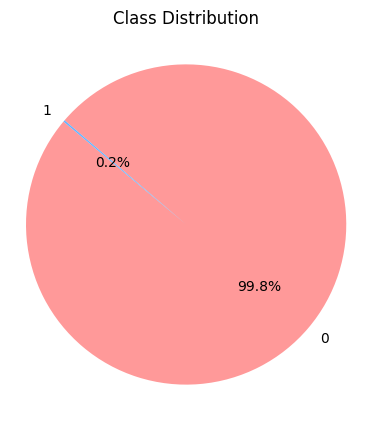

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
colors = ['#ff9999', '#66b3ff']
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Class Distribution')
plt.axis('equal')

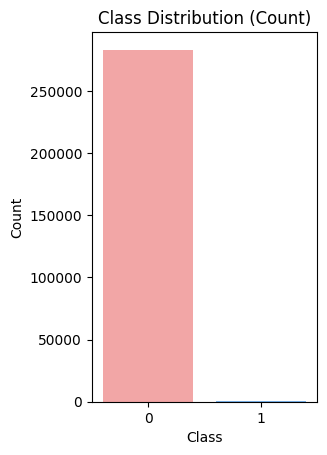

In [12]:
# Create a bar chart for class counts
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Class', palette=colors)
plt.title('Class Distribution (Count)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### PREPROCESSING

In [13]:
# Separate legitimate and fraudulent transactions
legitimate = data[data.Class == 0]
fraudulent = data[data.Class == 1]

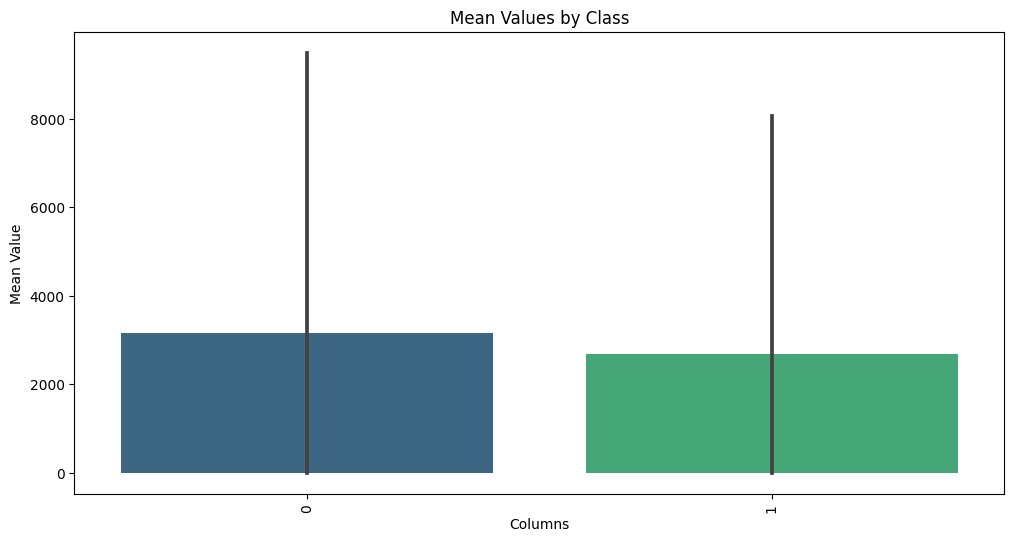

In [14]:
# Calculate and visualize the mean values by class
class_means = data.groupby('Class').mean().T

plt.figure(figsize=(12, 6))
sns.barplot(data=class_means, palette='viridis')
plt.title('Mean Values by Class')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Sample legitimate transactions to balance the dataset
legitimate_sample = legitimate.sample(n=473)

In [16]:
# Concatenate legitimate_sample and fraudulent transactions to create a new dataset
new_data = pd.concat([legitimate_sample, fraudulent], axis=0)

In [17]:
# Calculate and visualize the class distribution of the new dataset
class_counts = new_data['Class'].value_counts()
print(class_counts)

Class
0    473
1    473
Name: count, dtype: int64


(-1.099998146164224,
 1.0999997564610315,
 -1.099998146164224,
 1.0999997564610318)

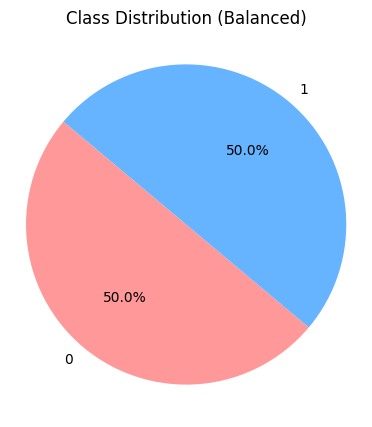

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Class Distribution (Balanced)')
plt.axis('equal')

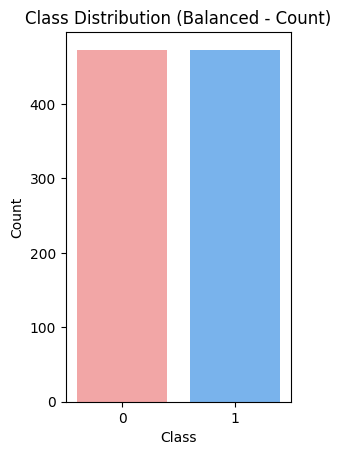

In [19]:
# Create a bar chart for class counts in the balanced dataset
plt.subplot(1, 2, 2)
sns.countplot(data=new_data, x='Class', palette=colors)
plt.title('Class Distribution (Balanced - Count)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [20]:
# Display statistics by class for the new dataset
new_data.groupby('Class').describe()


Time                                                                 \
       count          mean           std    min      25%      50%       75%   
Class                                                                         
0      473.0  93543.152220  47915.252294  643.0  54381.0  83033.0  137371.0   
1      473.0  80450.513742  48636.179973  406.0  41203.0  73408.0  129095.0   

                    V1            ...       V28           Amount              \
            max  count      mean  ...       75%       max  count        mean   
Class                             ...                                          
0      172581.0  473.0  0.081481  ...  0.080105  3.522256  473.0   77.680254   
1      170348.0  473.0 -4.498280  ...  0.372393  1.779364  473.0  123.871860   

                                                      
              std  min   25%    50%     75%      max  
Class                                                 
0      167.667314  0.0  6.02  24.99   83.63  1753.91  
1      260.211041  0.0  1.00   9.82  105.89  2125.87  

[2 rows x 240 columns]

### MODELING

In [21]:
# Prepare data for modeling
X = new_data.drop(columns=['Class'])
Y = new_data['Class']


In [22]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [23]:
# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [24]:
# Predict on training data and calculate accuracy
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data:', training_data_accuracy)

Accuracy on Training data: 0.9378306878306878


In [25]:
# Predict on test data and calculate accuracy
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test Data:', test_data_accuracy)

Accuracy on Test Data: 0.9368421052631579


### RESULTS

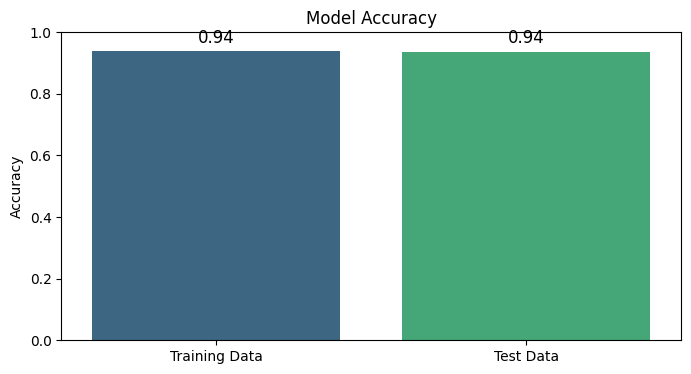

In [26]:
# Create a bar chart to visualize the accuracy
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=['Training Data', 'Test Data'], y=[training_data_accuracy, test_data_accuracy], palette='viridis')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Set the y-axis limit to ensure accuracy values fit within the plot

# Add accuracy values as text annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()
